# **Data Understanding and Exploration**

# 1. Dataset Overview

What is the source and context of your chosen dataset?

The chosen dataset is credit card Transactions and the goal of this dataset is to collect large number of detailed records related to credit card purchases such as  transaction time, payment amounts, merchant information, and related customer details.
As a result, People can use this dataset to apply their analyses on various aspects, such as Fraud Detection, Customer Segmentation, and Transaction Classification and so on.
Hugging Face was sourse that dataset was coming from. The problem domain it addresses includes financial , customer insights, and spending patterns.

# 2. Feature Description


What are the features (variables) present in the dataset? Is there a target variable?


*   Features of the dataset:

1.   Unnamed: 0

*   Data Type: int64
*   Category: Numerical
*   Description: Not shown on the dataset.


2.   trans_date_trans_time

*   Data Type: object
*   Category: Categorical
*   Description: calculate timestamp of the transaction.


3.   cc_num

*   Data Type: int64
*   Category: Numerical
*   Description: Credit card number.

4.   merchant

*   Data Type: object
*   Category: Categorical
*   Description: Merchant or store where the transaction occurred.

5.   category

*   Data Type: object
*   Category: Categorical
*   Description: Type of transaction (e.g., grocery, entertainment).

6.   amt

*   Data Type: float64
*   Category: Numerical
*   Description: calculate the amount of the transaction.

7.   first

*   Data Type: object
*   Category: Categorical
*   Description: First name of the cardholder.

8.   last

*   Data Type: object
*   Category: Categorical
*   Description: Last name of the cardholder.

9.   gender

*   Data Type: object
*   Category: Categorical
*   Description: Gender of the cardholder.

10.   street

*   Data Type: object
*   Category: Categorical
*   Description: Street address of the cardholder.

11.   city

*   Data Type: object
*   Category: Categorical
*   Description: City where the cardholder resides.

12.   state

*   Data Type: object
*   Category: Categorical
*   Description: state where the cardholder resides.

13.   zip

*   Data Type: int64
*   Category: Numerical
*   Description: Zip code of the cardholder.

14.   lat

*   Data Type: float64
*   Category: Numerical
*   Description: Geographical coordinates of the transaction.

15.   long

*   Data Type: float64
*   Category: Numerical
*   Description: Geographical coordinates of the transaction.

16.   city_pop

*   Data Type: int64
*   Category: Numerical
*   Description: Population of the city where the transaction occurred.

17.   job

*   Data Type: object
*   Category: Categorical
*   Description: Occupation of the cardholder.

18.   dob

*   Data Type: object
*   Category: Categorical
*   Description: Date of birth of the cardholder.

19.   trans_num

*   Data Type: object
*   Category: Categorical
*   Description: Unique transaction number.

20.   unix_time

*   Data Type: int64
*   Category: Numerical
*   Description: Unix timestamp of the transaction.

21.   merch_lat

*   Data Type: float64
*   Category: Numerical
*   Description: Geographical coordinates of the merchant.

22.   merch_long

*   Data Type: float64
*   Category: Numerical
*   Description: Geographical coordinates of the merchant.


23.   is_fraud

*   Data Type: int64
*   Category: Numerical
*   Description: Binary indicator of whether the transaction is fraudulent.

24.   merch_zipcode

*   Data Type: float64
*   Category: Numerical
*   Description: Geographical coordinates of the merchant.


The target variable is is_fraud since it used for fraud detection analysis.






In [1]:
import pandas as pd

# Load the dataset (assuming it's a CSV file, modify the path as needed)
dataset_path = "credit_card_transactions.csv"
df = pd.read_csv(dataset_path)

# Display only the first two rows of the dataset
print(df.head(2))

# Get information about the dataset: column names and data types for the first two rows
print("\nDataset Information (First Two Rows):")
print(df.head(2).info())

# Optionally, print the data types of the first two rows
print("\nData Types (First Two Rows):")
print(df.head(2).dtypes)


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   

                          merchant     category     amt      first   last  \
0       fraud_Rippin, Kub and Mann     misc_net    4.97   Jennifer  Banks   
1  fraud_Heller, Gutmann and Zieme  grocery_pos  107.23  Stephanie   Gill   

  gender                        street  ...      long city_pop  \
0      F                561 Perry Cove  ...  -81.1781     3495   
1      F  43039 Riley Greens Suite 393  ... -118.2105      149   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   

  is_fraud  merch

# 3. Dataset Structure

What is the size and structure of the dataset?

The dataset contains 1296675 rows , 24 columns  and 31120200 elements.

In [2]:
import pandas as pd

# Load the dataset (modify the file path as needed)
dataset_path = "credit_card_transactions.csv"
df = pd.read_csv(dataset_path)

# Get the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

# Display the size of the dataset (total elements)
print(f"Total Elements in Dataset: {df.size}")

Number of Rows: 1296675
Number of Columns: 24
Total Elements in Dataset: 31120200


# 4. Missing Values and Duplicates

Are there missing values or duplicates in the dataset?

All the column dont have missing value except merch_zipcode contain  195973 missing values. There are no duplicate rows and columns. As a result, the dataset is almost clean ,but the merch_zipcode column affect our analysis when merchant's location is important. Due to no duplicate on both rows and columns, there's no risk of redundant data affecting the analysis and decrease computation time performing on the module and analysis.

In [3]:
import pandas as pd

# Load the dataset (update the path as needed)
dataset_path = "credit_card_transactions.csv"
df = pd.read_csv(dataset_path)

# 1. Find duplicate columns more efficiently
def find_duplicate_columns(dataframe):
    duplicates = []
    seen = {}
    for col in dataframe.columns:
        col_data = dataframe[col].to_string()
        if col_data in seen:
            duplicates.append(col)
        else:
            seen[col_data] = col
    return duplicates

duplicate_columns = find_duplicate_columns(df)

# Display the result
if len(duplicate_columns) > 0:
    print("Duplicate Columns Found:", duplicate_columns)
else:
    print("No duplicate columns found.")

# 2. Check for missing values in each column
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)

# Total number of missing values in the entire dataset
total_missing = missing_values.sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage[missing_percentage > 0])  # Show only columns with missing values

# 3. Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

# Display sample duplicate rows, if any
if duplicate_rows > 0:
    print("\nSample Duplicate Rows:")
    print(df[df.duplicated()].head())


KeyboardInterrupt: 

# 5. Statistical Summary

Question: The amt (transaction amount) column shows a wide range with most transactions around 39.2, but some transactions have exceeded 27,500, suggesting a few very high-value purchases. The city_pop column varies largely, with most cities having populations around 3,124, but some cities have reached over 3 million, which could impact location-based analysis. Fraud (is_fraud column) is quite rare because it shows that only about 0.57% of transactions are fraudulent. The average transaction amount is approximately $64, but the values range widely, with some reaching nearly $28,500. The timestamps are captured in Unix time, with transactions spanning a range close to 5 years. Zip codes associated with transactions show a median around 49,247, indicating that transactions are mostly centered in typical U.S. regions. Latitude and longitude data suggest that most activities occur within the continental U.S., with customer and merchant locations showing similar geographic distributions.




In [1]:
import pandas as pd

# Load the dataset
dataset_path = "credit_card_transactions.csv"
df = pd.read_csv(dataset_path)

# Display summary statistics for numerical columns
summary_stats = df.describe().T
print("Summary Statistics:")
print(summary_stats)

# Calculate additional statistics: median and standard deviation
median_values = df.median(numeric_only=True)
std_values = df.std(numeric_only=True)

print("\nMedian Values:")
print(median_values)

print("\nStandard Deviation:")
print(std_values)

# Initial insights from data (optional: print the first few rows to understand structure)
print("\nFirst 5 Rows of Dataset:")
print(df.head())


Summary Statistics:
                   count          mean           std           min  \
Unnamed: 0     1296675.0  6.483370e+05  3.743180e+05  0.000000e+00   
cc_num         1296675.0  4.171920e+17  1.308806e+18  6.041621e+10   
amt            1296675.0  7.035104e+01  1.603160e+02  1.000000e+00   
zip            1296675.0  4.880067e+04  2.689322e+04  1.257000e+03   
lat            1296675.0  3.853762e+01  5.075808e+00  2.002710e+01   
long           1296675.0 -9.022634e+01  1.375908e+01 -1.656723e+02   
city_pop       1296675.0  8.882444e+04  3.019564e+05  2.300000e+01   
unix_time      1296675.0  1.349244e+09  1.284128e+07  1.325376e+09   
merch_lat      1296675.0  3.853734e+01  5.109788e+00  1.902779e+01   
merch_long     1296675.0 -9.022646e+01  1.377109e+01 -1.666712e+02   
is_fraud       1296675.0  5.788652e-03  7.586269e-02  0.000000e+00   
merch_zipcode  1100702.0  4.682575e+04  2.583400e+04  1.001000e+03   

                        25%           50%           75%           max

# 6. Data Distribution

Column names:
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

First 5 rows:
    Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Ku

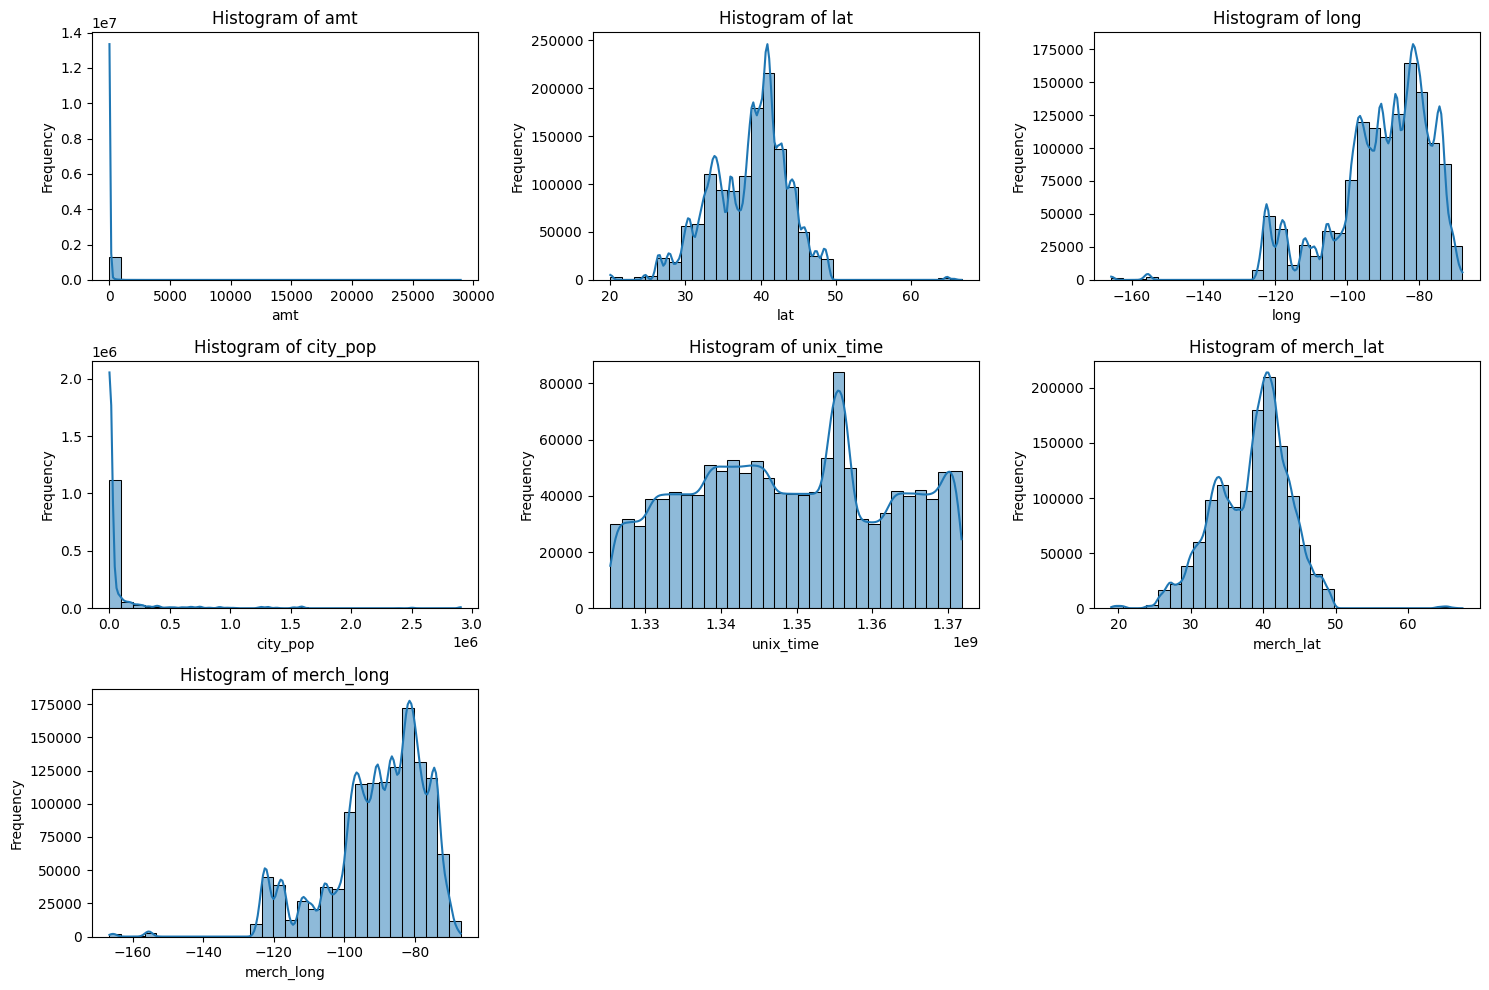

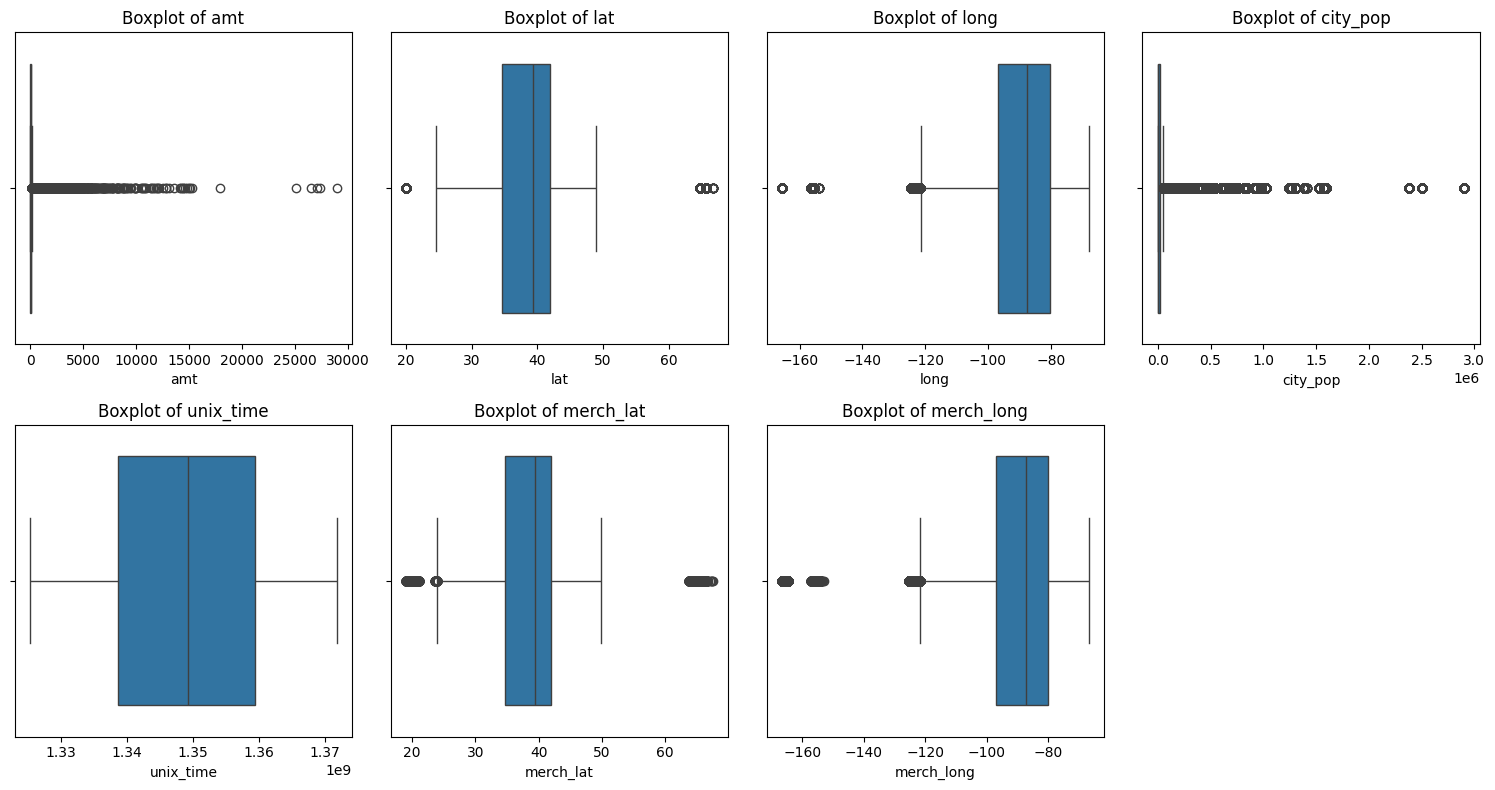

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "credit_card_transactions.csv"  # Update with the path to your CSV file
df = pd.read_csv(file_path)

# Display column names and first few rows to confirm data load
print("Column names:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())

# Step 1: Drop irrelevant or missing columns
# Here, we'll drop any columns that are mostly empty or non-essential for visualization
df.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last',
         'street', 'city', 'state', 'job', 'dob', 'trans_num', 'merch_zipcode'], axis=1, inplace=True)

# Step 2: Visualize Numerical Feature Distributions using Histograms
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 3: Visualize Numerical Feature Distributions using Box Plots
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


# 7. Correlation Analysis

The traget variable is fraud.
Form the heatmap graph:
amt column shows a strong correlation with fraud (0.18), so this suggests that higher transaction amounts might be related to fraudulent activities.

The three column  zip code, latitude, and longitude show very weak correlation close to zero(around -0.002 to 0.001). As a result, the location data of customers and merchants does not have a strong relationship with whether a transaction is fraudulent or not.

The two column city_pop and unix_time show very minimal correlation with fraud(around 0.0031 and -0.0007 respectively) showing that the size of a city or the time of a transaction doesn't affect whether a transaction is fraudulent.

The two column merch_lat and merch_long show very weak correlation close to zero(-0.0015 to 0.0018) , so the merchant’s location doesn’t affect fraud.


Correlation with target variable 'is_fraud':
 is_fraud      1.000000
amt           0.219404
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
zip          -0.002162
unix_time    -0.005078
Name: is_fraud, dtype: float64


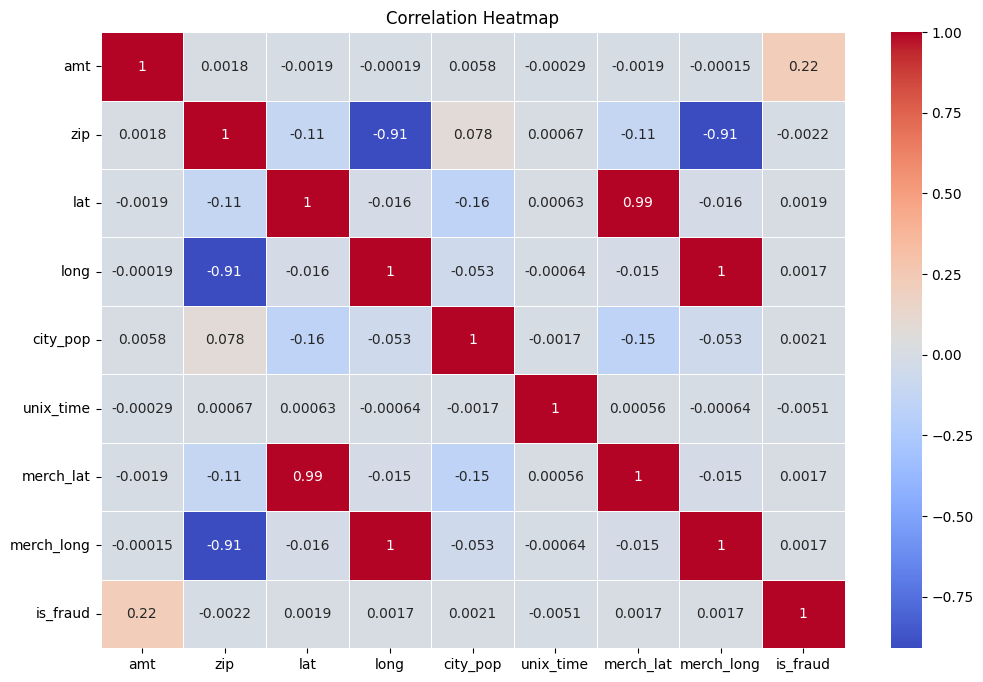

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = "credit_card_transactions.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Drop irrelevant columns
df.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last',
         'street', 'city', 'state', 'job', 'dob', 'trans_num', 'merch_zipcode'], axis=1, inplace=True)

# Step 1: Convert categorical variables to numerical if possible, or drop non-numeric columns
df = df.apply(pd.to_numeric, errors='coerce')

# Step 2: Drop columns with non-numeric data or that have been converted to NaN
df.dropna(axis=1, inplace=True)

# Step 3: Calculate Correlation Coefficients
correlation_matrix = df.corr()

# Print correlation with the target variable 'is_fraud'
print("Correlation with target variable 'is_fraud':\n", correlation_matrix['is_fraud'].sort_values(ascending=False))

# Visualize Correlation using Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



# 8. Outlier Detection
Are there any outliers or anomalies in the data?

We analyzed the amt column( most related column to fraud)  to search for outliers. From the boxplot, most transaction amounts are between 0 and 10,000. After 15,000, there is one outlier between 15,000 and 20,000. Additionally, there are four outliers with values between 25,000 and 30,000. 
In histogram, most frequency values are located around zero and the rest amt values at zero frequency. Because of the graph is right skewed, the outlier on the right side.
As a result, these high amounts could indicate potential fraud  and it affect our detect fraud.


First 5 rows of the dataset:
    Unnamed: 0 trans_date_trans_time        cc_num  \
0           0   2019-01-01 00:00:18  2.703186e+15   
1           1   2019-01-01 00:00:44  6.304233e+11   
2           2   2019-01-01 00:00:51  3.885949e+13   
3           3   2019-01-01 00:01:16  3.534094e+15   
4           4   2019-01-01 00:03:06  3.755342e+14   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781   3495.0   
1     Gill      F  43039 Riley Greens Suite 393  .

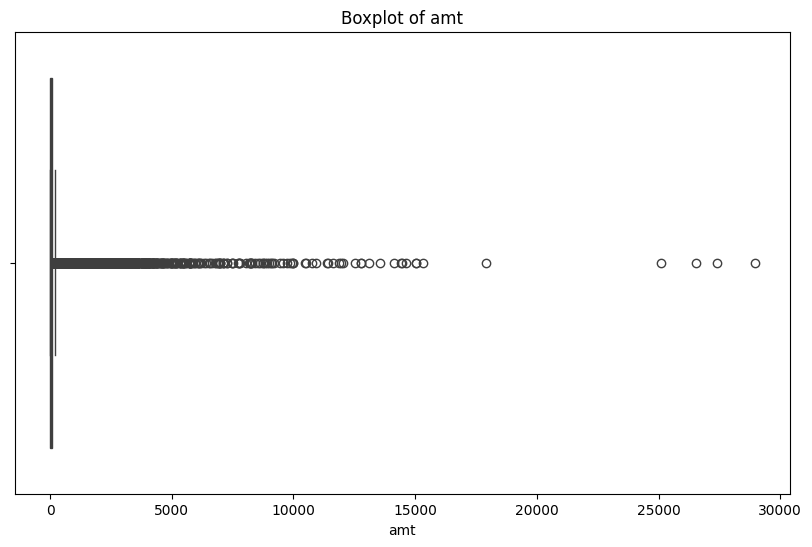

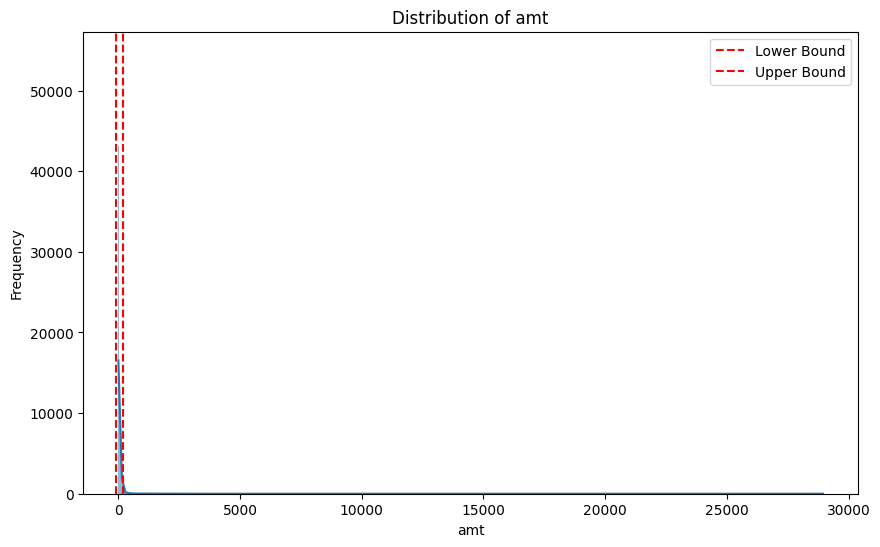

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the CSV file
file_path = "credit_card_transactions.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:\n", df.head())

# Step 1: Data Preprocessing
# Select a numeric column for outlier detection (update 'column_name' as needed)
column_name = "amt"  # Replace with your column of interest
if column_name not in df.columns:
    raise ValueError(f"Column '{column_name}' not found in the dataset.")

# Drop rows with missing values in the selected column
df = df[[column_name]].dropna()

# Step 2: Detect Outliers using IQR Method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print("\nOutliers using IQR method:\n", outliers_iqr)

# Step 3: Detect Outliers using Z-score Method
df['z_score'] = zscore(df[column_name])
outliers_zscore = df[np.abs(df['z_score']) > 3]
print("\nOutliers using z-score method:\n", outliers_zscore)

# Step 4: Visualize Outliers with Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column_name])
plt.title('Boxplot of ' + column_name)
plt.xlabel(column_name)
plt.show()

# Step 5: Visualize Outliers with Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], kde=True)
plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.legend()
plt.title('Distribution of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()


# **Data Preprocessing** *italicized text*

# 9. Handling Missing Data
Handling missing data involves deciding how to treat missing values, either by removing them or imputing them.

In [2]:
# Handling missing data
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Drop column with excessive missing values (e.g., 'merch_zipcode')
df = df.drop(columns=['merch_zipcode'], errors='ignore')

# Impute numerical columns with missing values using the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verify the changes
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values in Each Column:
Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

Missing Values After Handling:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                  

# 10. Encoding Categorical Variables

Categorical data needs to be encoded into numerical values for machine learning algorithms. Here, I'll use one-hot encoding for categorical variables.

In [3]:
from sklearn.preprocessing import LabelEncoder

# Check the columns and identify categorical ones
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame with encoded columns
print("\nUpdated DataFrame with Encoded Columns:")
print(df.head())


Updated DataFrame with Encoded Columns:
   Unnamed: 0  trans_date_trans_time            cc_num  merchant  category  \
0           0                      0  2703186189652095       514         8   
1           1                      1      630423337322       241         4   
2           2                      2    38859492057661       390         0   
3           3                      3  3534093764340240       360         2   
4           4                      4   375534208663984       297         9   

      amt  first  last  gender  street  ...      lat      long  city_pop  job  \
0    4.97    162    18       0     568  ...  36.0788  -81.1781      3495  370   
1  107.23    309   157       0     435  ...  48.8878 -118.2105       149  428   
2  220.11    115   381       1     602  ...  42.1808 -112.2620      4154  307   
3   45.00    163   463       1     930  ...  46.2306 -112.1138      1939  328   
4   41.96    336   149       1     418  ...  38.4207  -79.4629        99  116   

   

# 11. Feature Scaling
Feature scaling ensures that all numerical features have the same scale, which is important for distance-based algorithms. I'll use standard scaling here.

In [4]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'is_fraud' from the scaling process
numerical_columns = numerical_columns[numerical_columns != 'is_fraud']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns (excluding 'is_fraud')
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the DataFrame after scaling
print("\nDataFrame after Feature Scaling (excluding target variable 'is_fraud'):")
print(df.head())



DataFrame after Feature Scaling (excluding target variable 'is_fraud'):
   Unnamed: 0  trans_date_trans_time    cc_num  merchant  category       amt  \
0   -1.732049                      0 -0.316692       514         8 -0.407826   
1   -1.732047                      1 -0.318757       241         4  0.230039   
2   -1.732044                      2 -0.318728       390         0  0.934149   
3   -1.732041                      3 -0.316058       360         2 -0.158132   
4   -1.732039                      4 -0.318471       297         9 -0.177094   

   first  last  gender  street  ...       lat      long  city_pop  job  dob  \
0    162    18       0     568  ... -0.484420  0.657620 -0.282589  370  779   
1    309   157       0     435  ...  2.039120 -2.033870 -0.293670  428  607   
2    115   381       1     602  ...  0.717754 -1.601537 -0.280406  307  302   
3    163   463       1     930  ...  1.515617 -1.590766 -0.287742  328  397   
4    336   149       1     418  ... -0.023035  0.78

# 12. Feature Selection
Feature selection identifies the most relevant features for predictive modeling. I'll demonstrate feature importance using correlation and variance threshold.

In [5]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier


# Calculate the correlation matrix for all features, including the target variable
corr_matrix = df.corr()

# Get features highly correlated with the target variable 'is_fraud'
target_corr = corr_matrix['is_fraud'].sort_values(ascending=False)

# Display features highly correlated with 'is_fraud' (both positive and negative)
print("\nFeatures Correlated with Target 'is_fraud':")
print(target_corr)

# Select features that have high correlation with 'is_fraud' (greater than 0.1 or less than -0.1)
# We exclude 'is_fraud' itself from the features list
selected_features = target_corr[target_corr.abs() > 0.1].index.tolist()
selected_features.remove('is_fraud')  # Removing the target variable from the selected features list

# Display the features selected based on correlation with 'is_fraud'
print("\nSelected Features for Model Based on Correlation with 'is_fraud':")
print(selected_features)

# Remove features with low variance or high correlation with others (multicollinearity)
# We can drop features based on further analysis or domain knowledge, but for now,
# we will keep the selected features and drop the rest.

df_selected = df[selected_features + ['is_fraud']]

# Display the DataFrame after feature selection
print("\nDataFrame after Feature Selection:")
print(df_selected.sample(15))



Features Correlated with Target 'is_fraud':
is_fraud                 1.000000
amt                      0.219404
category                 0.020205
gender                   0.007642
city_pop                 0.002136
lat                      0.001894
merch_lat                0.001741
state                    0.001730
merch_long               0.001721
long                     0.001721
street                   0.001448
trans_num                0.000804
job                     -0.000093
last                    -0.000096
merchant                -0.000536
cc_num                  -0.000981
city                    -0.002092
zip                     -0.002162
first                   -0.003219
Unnamed: 0              -0.004767
trans_date_trans_time   -0.004777
unix_time               -0.005078
dob                     -0.012156
Name: is_fraud, dtype: float64

Selected Features for Model Based on Correlation with 'is_fraud':
['amt']

DataFrame after Feature Selection:
              amt  is_fraud
302

# Data Modeling

## 1. Algorithm Selection
For analyzing the Credit Card Transactions dataset, the problem type is typically binary classification (fraud detection) or unsupervised clustering (customer segmentation).

1. Classification:
*   Logistic Regression and Decision Trees: Good for interpretability and fast training.


*   Random Forest and XGBoost: Effective for handling imbalanced datasets common in fraud detection.

*   Neural Networks: Suitable for large datasets with complex patterns but require careful tuning.


2. Clustering:


*   K-Means: Useful for grouping similar transaction patterns but sensitive to initial clustering.

*   DBSCAN: Handles varying densities, useful for anomaly detection in high-dimensional data​.

## XGBoost is the best choice
for fraud detection due to its high accuracy, handling of imbalanced data, and ability to deal with complex patterns in large datasets. Here's a brief comparison with other algorithms:

1.  Logistic Regression:

Why not: It assumes a linear relationship between the features and the target variable, which may not capture the complex patterns in fraud detection. It's also less effective for imbalanced datasets​.

2. Decision Trees:

Why not: While interpretable, decision trees tend to overfit easily, especially with complex datasets like fraud detection. They struggle to generalize well without pruning or ensemble methods​.

3. Random Forest:

Why not: Random Forest is more robust than decision trees and handles overfitting better. However, XGBoost often outperforms it in terms of both speed and accuracy, especially when tuned properly.

4. Neural Networks:

Why not: While effective, neural networks require large datasets and extensive tuning. They also lack interpretability, which is crucial in fraud detection. XGBoost is faster and more interpretable​.

## 2. Data Splitting
We'll use the train-test split method to divide the dataset into training and testing sets. We will also stratify the split to ensure that the class distribution (fraud vs. non-fraud) remains balanced across both sets.

In [ ]:
# import kagglehub
import pandas as pd

# Download latest version
# path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

# print("Path to dataset files:", path)

from sklearn.model_selection import train_test_split

#data = pd.read_csv('path_to_your_dataset.csv')

data = df_selected

# features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long'] 
# features = selected_features  # Add more features as needed
X = data[selected_features]
# X = features
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(y_train.value_counts())


is_fraud
0    902418
1      5254
Name: count, dtype: int64


## 3. Model Training
We'll train an XGBoost classifier. XGBoost is configured with the binary logistic regression objective for fraud detection and uses AUC (Area Under the Curve) as the evaluation metric.

In [12]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False)

model.fit(X_train, y_train)


c:\Users\96650\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## 4. Model Evaluation
To evaluate the performance of the model, we will use a variety of metrics: Confusion Matrix, Classification Report, and AUC-ROC score. These will give us insights into the model’s ability to detect fraud (True Positives) and avoid false alarms (False Positives).

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for AUC-ROC

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
[[386751      0]
 [  2252      0]]

Classification Report:


c:\Users\96650\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\96650\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\96650\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003


AUC-ROC Score: 0.9618998339782998


## 5. Performance Analysis
In this step, we assess how well the model performs based on the evaluation metrics:



*   Confusion Matrix: This helps us understand how many fraud transactions (True Positives) and legitimate transactions (True Negatives) the model correctly identified, as well as the false positives and false negatives.


*   Classification Report: It provides a detailed view of Precision, Recall, and F1-Score, which are crucial for imbalanced datasets.


*   AUC-ROC: AUC measures the model's ability to distinguish between classes. A higher AUC indicates a better model.

## 6. Model Improvement
To improve the model, we can use techniques like hyperparameter tuning, feature engineering, or trying different algorithms. Below is an example of tuning hyperparameters using GridSearchCV.

In [14]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\96650\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\96650\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:19:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\96650\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\96650\anaconda3\Lib\site-packages\

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


## 7. Validation
To ensure that the model generalizes well, we can use k-fold cross-validation. This divides the training data into multiple subsets and trains the model on different combinations of training and validation data.

In [15]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Print the average cross-validation score
print("Average AUC-ROC from Cross-Validation:", cv_scores.mean())


c:\Users\96650\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\96650\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\96650\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\96650\anaconda3\Lib\site-packages\

Average AUC-ROC from Cross-Validation: 0.9612064761465934


## 8. Final Model Selection
After testing different hyperparameters and models, we will choose the model that provides the best performance based on the AUC-ROC, precision, and recall values. XGBoost, after hyperparameter tuning, tends to perform well in terms of accuracy and generalization on imbalanced datasets.

In [16]:
# Final model evaluation after hyperparameter tuning
final_model = grid_search.best_estimator_

# Evaluate final model
final_y_pred = final_model.predict(X_test)
final_y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Final performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, final_y_pred))

print("\nClassification Report:")
print(classification_report(y_test, final_y_pred))

print("\nAUC-ROC Score:", roc_auc_score(y_test, final_y_pred_proba))


Confusion Matrix:
[[386751      0]
 [  2252      0]]

Classification Report:


c:\Users\96650\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\96650\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\96650\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003


AUC-ROC Score: 0.962585664291609


# Data visualization

## 1. Data Distribution
We will visualize how different features are distributed using various plots, including histograms, boxplots, and bar plots for categorical features. This helps in identifying patterns, outliers, and anomalies.

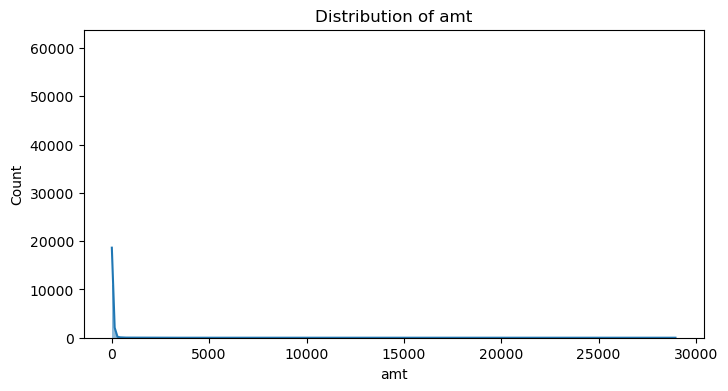

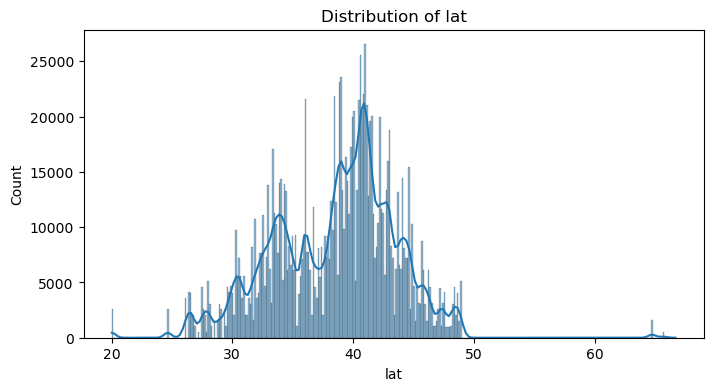

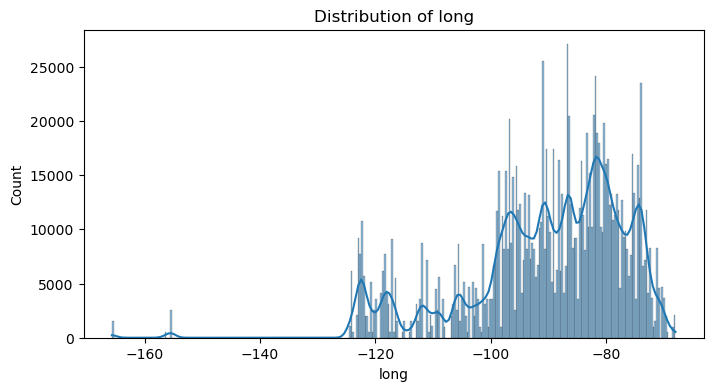

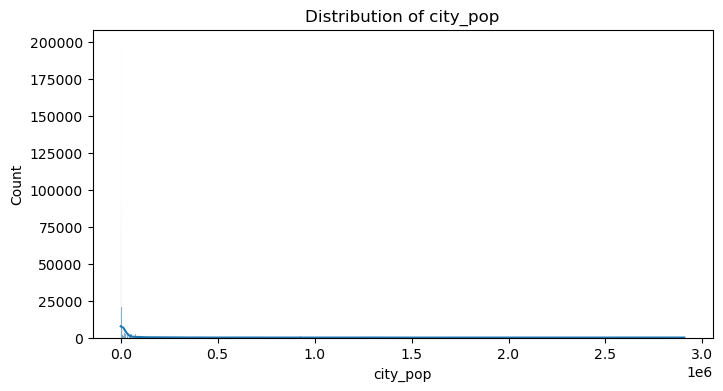

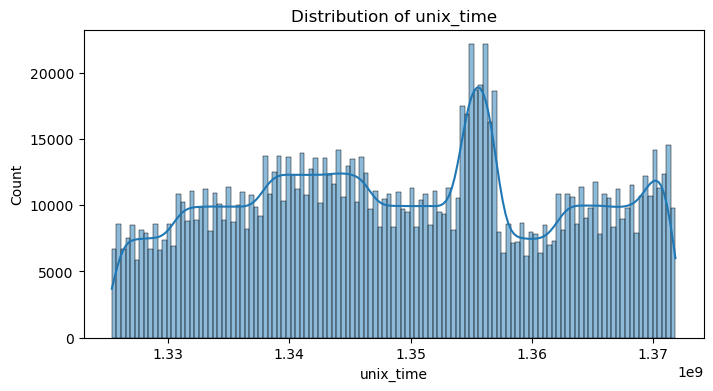

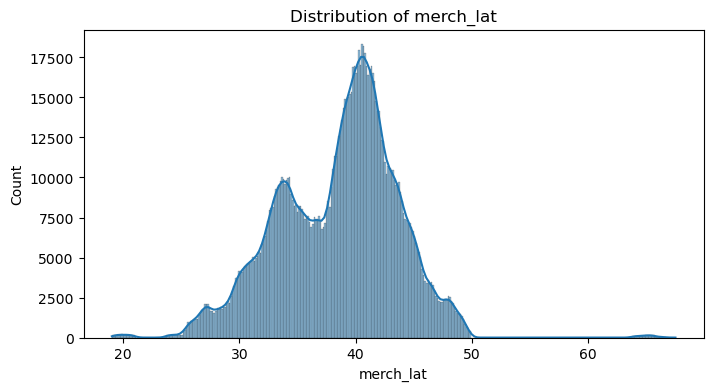

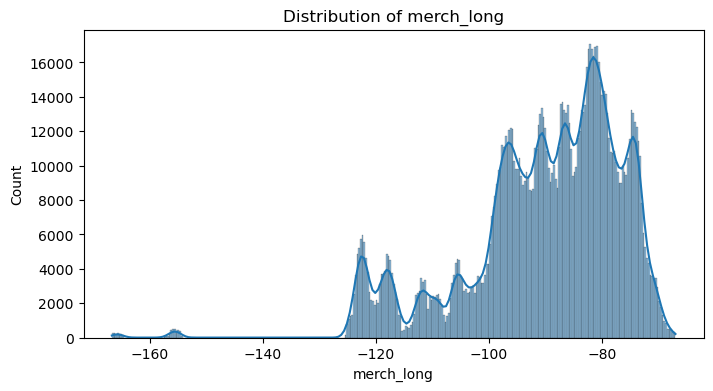

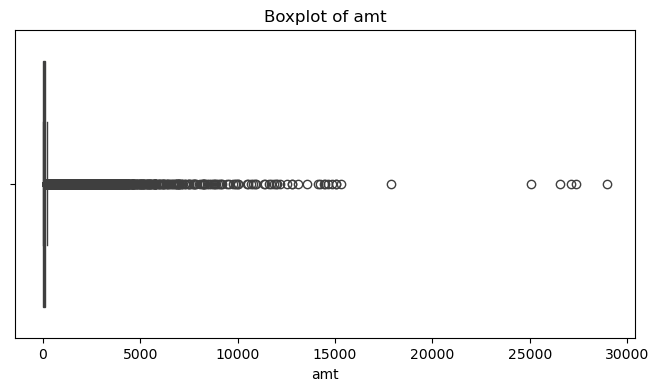

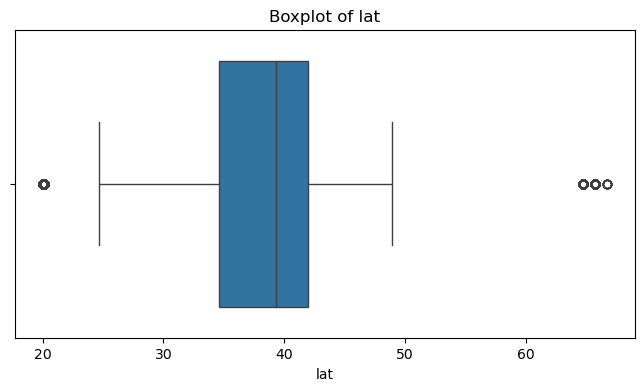

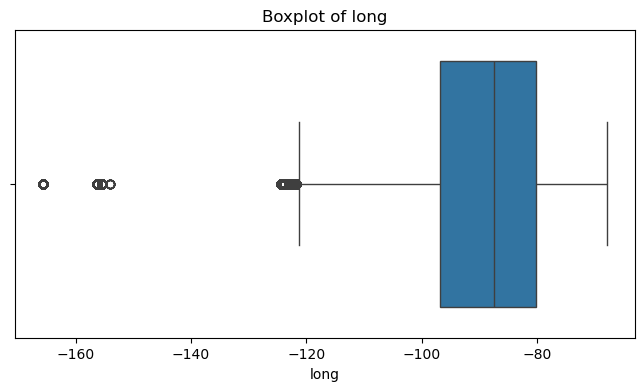

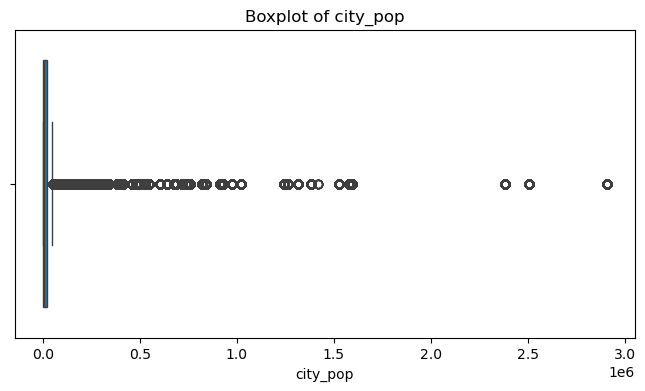

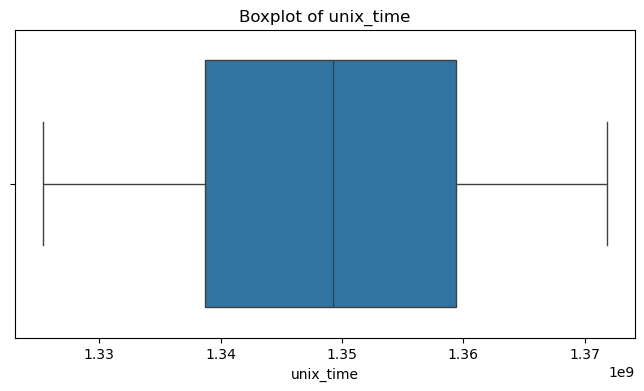

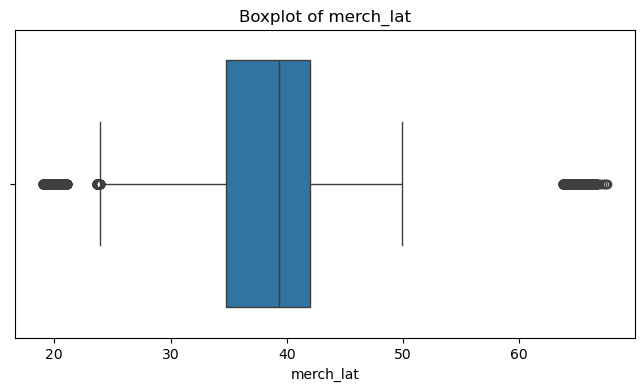

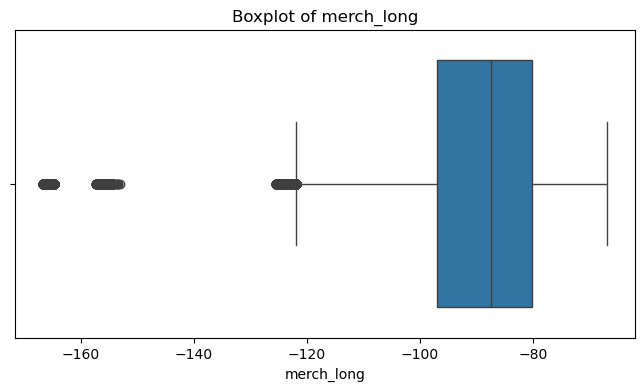

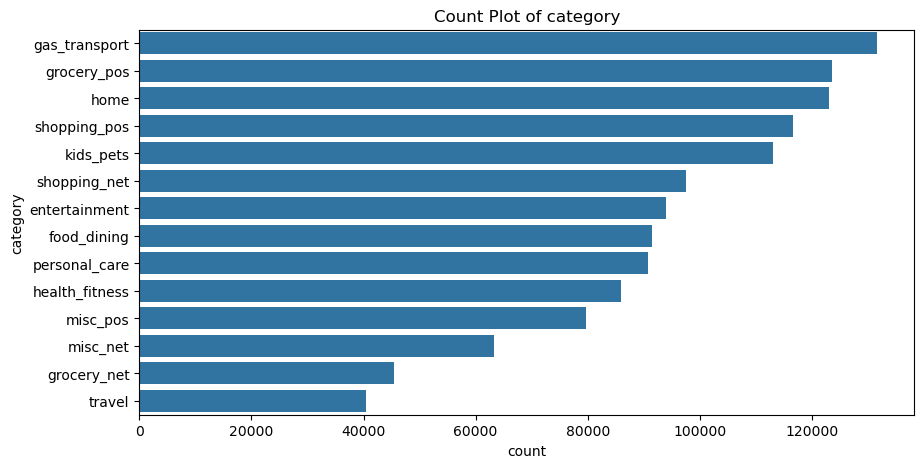

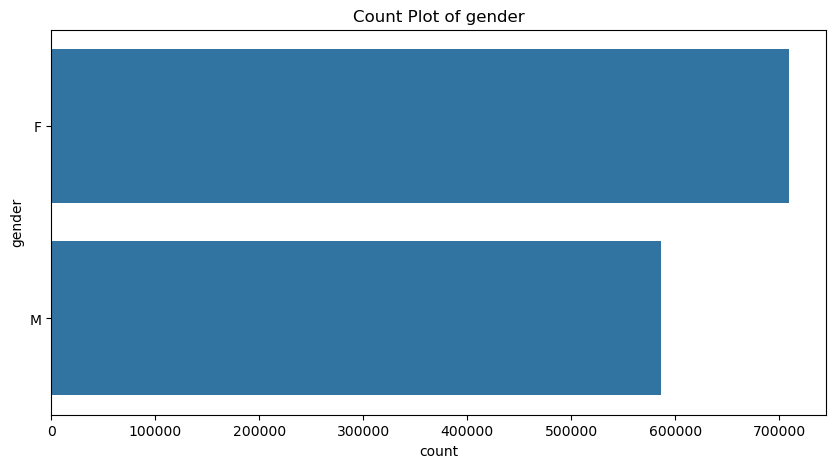

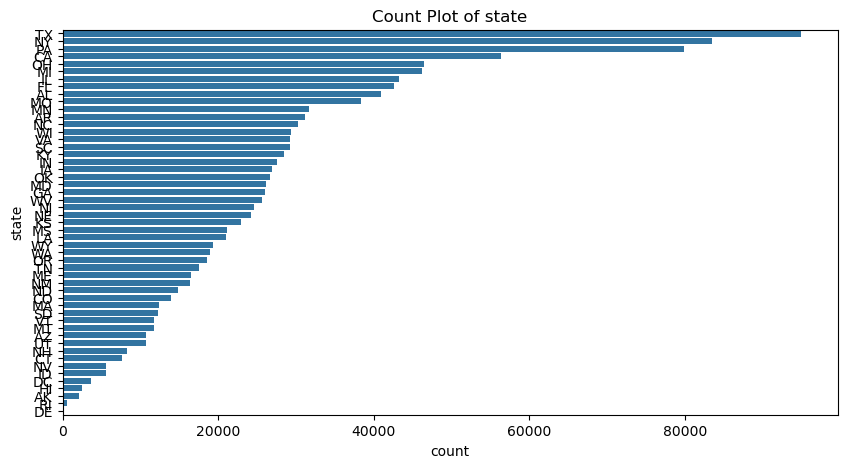

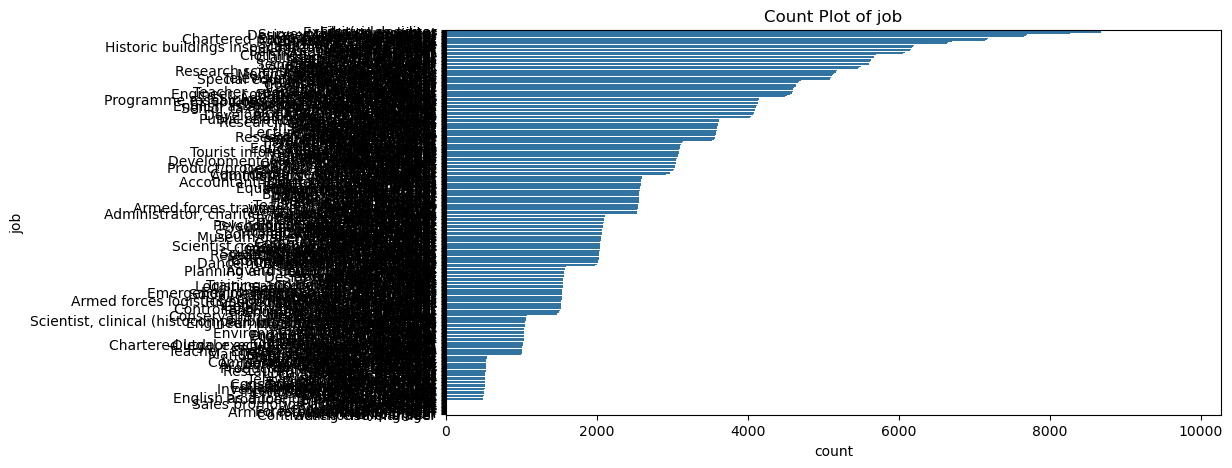

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('credit_card_transactions.csv')
# import kagglehub
# import pandas as pd

# Download latest version
# data = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']


for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

categorical_features = ['category', 'gender', 'state', 'job']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data[feature], order=data[feature].value_counts().index)
    plt.title(f"Count Plot of {feature}")
    plt.show()


## 2. Feature Importance
Feature importance will be visualized using the XGBoost model. Tree-based models like XGBoost provide a built-in way to interpret which features are most influential.

c:\Users\96650\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


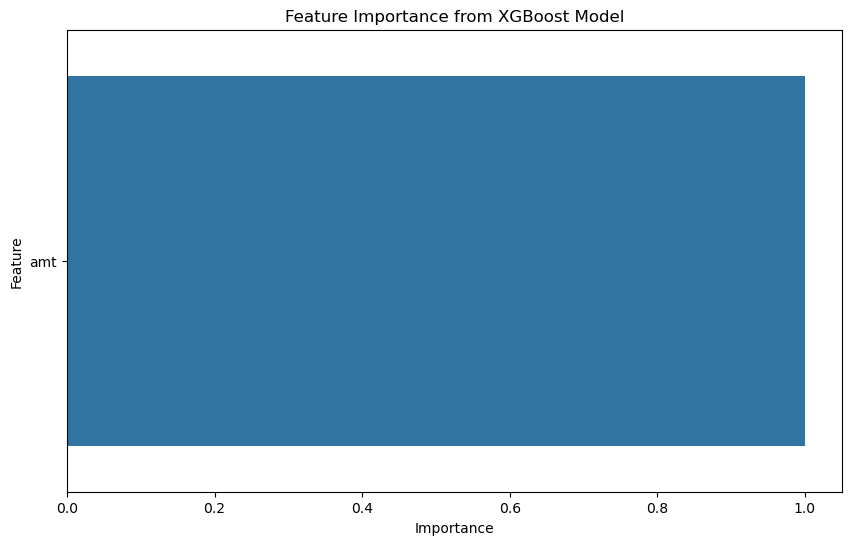

In [19]:
import xgboost as xgb
import matplotlib.pyplot as plt

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Feature Importance from XGBoost Model')
plt.show()


## 3. Model Performance Across Features
We will explore how the model’s predictions change across different values of features using Partial Dependence Plots (PDP) and SHAP values for more advanced interpretability.

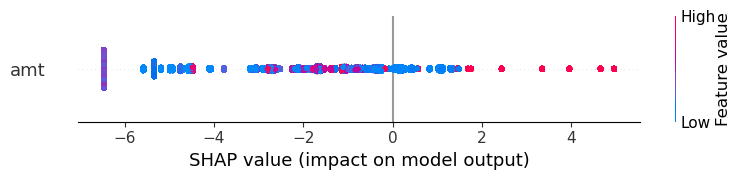

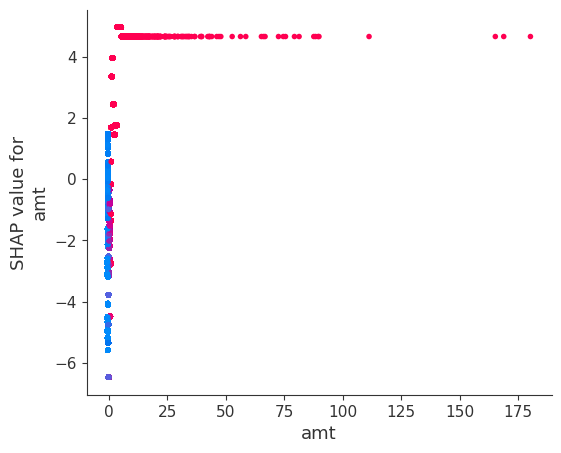

In [24]:
import shap

# Ensure you have the SHAP library installed
# !pip install shap

# Using SHAP to explain the model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot to visualize feature impact
shap.summary_plot(shap_values, X_test)

# SHAP dependence plot for individual feature effects
for feature in features:
    shap.dependence_plot(feature, shap_values, X_test)


## Explanation of Visualizations
1. Data Distribution: Histograms and boxplots help in assessing the spread and identifying anomalies or outliers in numerical features. Count plots provide a view of the frequency distribution of categorical features.
2. Feature Importance: Bar plots derived from the XGBoost model highlight which features have the most impact on model predictions.
3. Model Performance Across Features: Partial Dependence Plots and SHAP values give insights into how individual features influence the model's predictions.